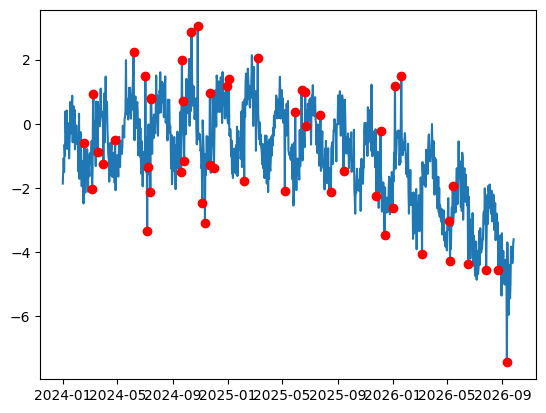

               value  anomalous
timestamp                      
2024-01-01 -1.864735      False
2024-01-02 -1.474693      False
2024-01-03 -1.074966      False
2024-01-04 -1.501315      False
2024-01-05 -0.650318      False


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def signal(n: int) -> np.ndarray:
    x = np.linspace(0, 1.5, n)
    mu = np.sin(20 * np.pi * x) - 4 * (x - 1/2) ** 2
    return mu

def noise(n: int) -> np.ndarray:
    error = np.random.randn(n) / 2
    return error

def outlier(n: int, min_height: float = 1.0, n_outliers: int = 0) -> np.ndarray:
    outliers = np.zeros(n)
    indices = np.random.choice(np.arange(n), size=n_outliers, replace=False)
    outlier_heights = np.random.uniform(1, 2, size=n_outliers) * min_height
    outlier_sign = (2 * np.random.randint(0, 2, n_outliers) - 1)
    outlier_heights = outlier_sign * outlier_heights
    outliers[indices] = outlier_heights
    return outliers, indices

def create_dataframe(n: int, start_date: str = '2024-01-01', freq: str = 'D') -> pd.DataFrame:

    outliers, indices = outlier(n, n_outliers=int(0.05*n))
    
    y = signal(n) + noise(n) + outliers
    
    is_anomalous = np.zeros(n, dtype=bool)
    is_anomalous[indices] = True

    timestamps = pd.date_range(start=start_date, periods=n, freq=freq)

    df = pd.DataFrame({
        'value': y,
        'anomalous': is_anomalous
    }, index=timestamps)

    df.index.name = 'timestamp' 
    return df

if __name__ == '__main__':
    n = 1000
    df = create_dataframe(n)
    plt.plot(df.index,df['value'])
    anomalous_points = df[df['anomalous']]
    plt.scatter(anomalous_points.index, anomalous_points['value'], color='red', label='Anomalies', zorder=5)

    plt.show()

    print(df.head())
    df.to_csv("synth.csv")


C:\Users\A113600123\AppData\Local\Temp\ipykernel_19652\2649303013.py:21: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


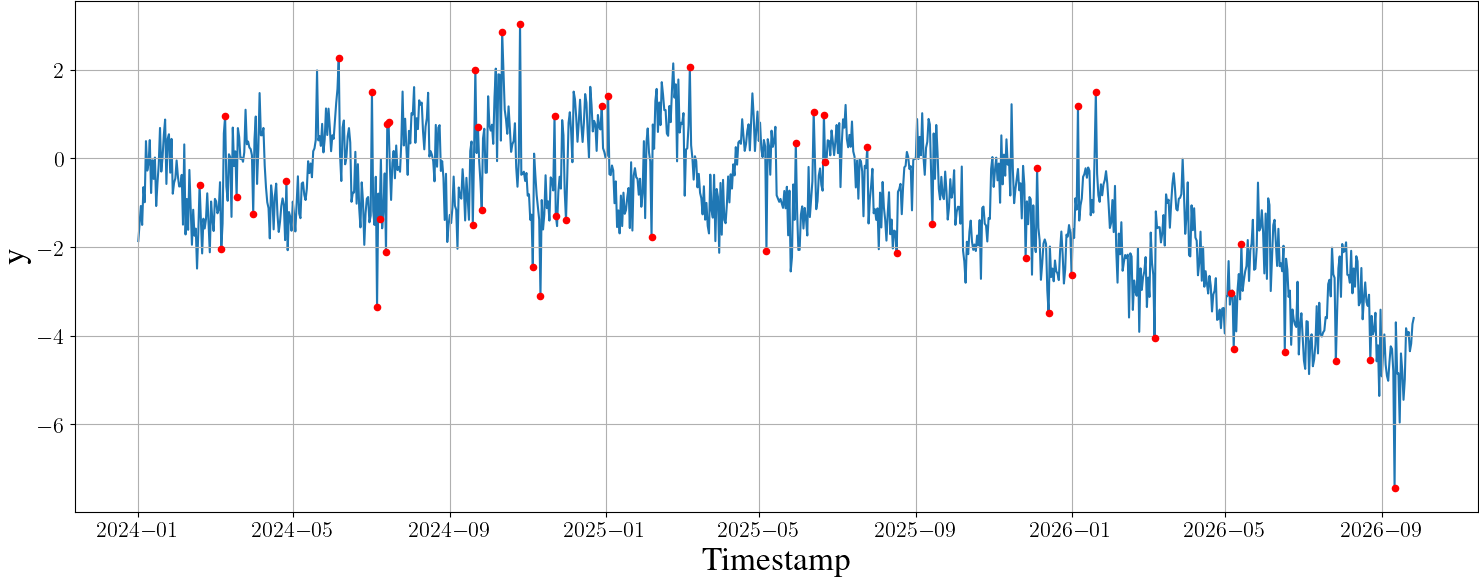

In [57]:
from tueplots import bundles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from river import drift

bundles.icml2024()
bundles.icml2024(family="sans-serif", usetex=False, column="full", nrows=2)

with plt.rc_context(bundles.icml2024(family="serif",column="full", usetex=True, nrows=2)):
    plt.figure(figsize=(15, 6))
    anomalous_points = df[df['anomalous']]
    plt.scatter(anomalous_points.index, anomalous_points.value, color='red', label='Anomalies', s=20, zorder=2) 
    plt.plot(df.index, df.value, zorder=1)

    plt.tick_params(axis='both', which='major', labelsize=16) 

    plt.xlabel('Timestamp', fontsize=24)
    plt.ylabel('y', fontsize=24)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('./synth_data.pdf') 
    plt.show()